## 1. Ler os dados

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('Real_State_Properati.csv', sep = '\t')
df


,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0


## 2. Substituir os valores zerados pela média dos pares

In [6]:

dfdiffsurfacezerado = df['surface_total_in_m2'] != 0 
df2 = df[dfdiffsurfacezerado]
dfGroup = df2.groupby(['property_type', 'place_name']).mean('surface_total_in_m2')
dfmerge = pd.merge(df, dfGroup, on=['property_type', 'place_name'])
dfmerge = dfmerge.rename(columns={'surface_total_in_m2_y': 'surface_total_in_m2_media'})
dfmerge

,property_type,place_name,country_name,state_name,lat_x,lon_x,price_x,currency,surface_total_in_m2_x,lat_y,lon_y,price_y,surface_total_in_m2_media
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,-34.653567,-58.501810,119049.180328,100.442623
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,-34.653567,-58.501810,119049.180328,100.442623
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,28.0,-34.653567,-58.501810,119049.180328,100.442623
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,326.0,-34.653567,-58.501810,119049.180328,100.442623
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,150.0,-34.653567,-58.501810,119049.180328,100.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,143.0,-34.594894,-58.422291,254500.000000,131.500000
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.0,-34.585679,-58.476317,270000.000000,150.000000
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.0,-34.580888,-58.410504,695000.000000,348.000000
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.0,-34.588465,-58.485428,420000.000000,350.000000


In [8]:
dfmerge['surface_total_in_m2_Final'] = np.where(dfmerge['surface_total_in_m2_x']== 0, dfmerge['surface_total_in_m2_media'] , dfmerge['surface_total_in_m2_x'])
dfmerge

,property_type,place_name,country_name,state_name,lat_x,lon_x,price_x,currency,surface_total_in_m2_x,lat_y,lon_y,price_y,surface_total_in_m2_media,surface_total_in_m2_Final
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,-34.653567,-58.501810,119049.180328,100.442623,55.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,-34.653567,-58.501810,119049.180328,100.442623,140.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,28.0,-34.653567,-58.501810,119049.180328,100.442623,28.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,326.0,-34.653567,-58.501810,119049.180328,100.442623,326.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,150.0,-34.653567,-58.501810,119049.180328,100.442623,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,143.0,-34.594894,-58.422291,254500.000000,131.500000,143.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.0,-34.585679,-58.476317,270000.000000,150.000000,150.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.0,-34.580888,-58.410504,695000.000000,348.000000,348.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.0,-34.588465,-58.485428,420000.000000,350.000000,350.0


## 3.Preço M²

In [9]:
dfmerge['Preco_M2'] = dfmerge['price_x'] / dfmerge['surface_total_in_m2_Final']
dfmerge

,property_type,place_name,country_name,state_name,lat_x,lon_x,price_x,currency,surface_total_in_m2_x,lat_y,lon_y,price_y,surface_total_in_m2_media,surface_total_in_m2_Final,Preco_M2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,-34.653567,-58.501810,119049.180328,100.442623,55.0,1127.272727
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,-34.653567,-58.501810,119049.180328,100.442623,140.0,1707.142857
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,28.0,-34.653567,-58.501810,119049.180328,100.442623,28.0,1892.857143
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,326.0,-34.653567,-58.501810,119049.180328,100.442623,326.0,751.533742
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,150.0,-34.653567,-58.501810,119049.180328,100.442623,150.0,1100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,143.0,-34.594894,-58.422291,254500.000000,131.500000,143.0,2307.692308
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.0,-34.585679,-58.476317,270000.000000,150.000000,150.0,1800.000000
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.0,-34.580888,-58.410504,695000.000000,348.000000,348.0,1997.126437
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.0,-34.588465,-58.485428,420000.000000,350.000000,350.0,1200.000000


In [10]:
dfmerge

,property_type,place_name,country_name,state_name,lat_x,lon_x,price_x,currency,surface_total_in_m2_x,lat_y,lon_y,price_y,surface_total_in_m2_media,surface_total_in_m2_Final,Preco_M2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,-34.653567,-58.501810,119049.180328,100.442623,55.0,1127.272727
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,-34.653567,-58.501810,119049.180328,100.442623,140.0,1707.142857
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,28.0,-34.653567,-58.501810,119049.180328,100.442623,28.0,1892.857143
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,326.0,-34.653567,-58.501810,119049.180328,100.442623,326.0,751.533742
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,150.0,-34.653567,-58.501810,119049.180328,100.442623,150.0,1100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,143.0,-34.594894,-58.422291,254500.000000,131.500000,143.0,2307.692308
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.0,-34.585679,-58.476317,270000.000000,150.000000,150.0,1800.000000
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.0,-34.580888,-58.410504,695000.000000,348.000000,348.0,1997.126437
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.0,-34.588465,-58.485428,420000.000000,350.000000,350.0,1200.000000


In [11]:
array = dfmerge.to_numpy()

PH = []
apartment = []
house = []
store = []

for i in range(len(array.T[0])):
    if array.T[0][i] == 'PH':
        PH.append(array.T[14][i])
    if array.T[0][i] == 'apartment':
        apartment.append(array.T[14][i])
    if array.T[0][i] == 'house':
        house.append(array.T[14][i])
    if array.T[0][i] == 'store':
        store.append(array.T[14][i])

media_PH = np.mean(PH)
media_ap = np.mean(apartment)
media_houseH = np.mean(house)
media_store = np.mean(store)

<BarContainer object of 4 artists>

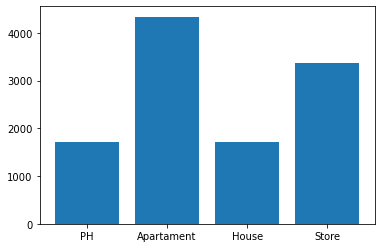

In [16]:
x = ['PH', 'Apartament', 'House', 'Store']

y = [media_PH, media_ap, media_houseH, media_store]

plt.bar (x, y)

